In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as s
import scipy.stats as ss

In [6]:
data=pd.read_csv(r"C:\Users\seeth\python 232\Statistics\cleaned data of autos.csv")

In [8]:
df=data.copy()

In [23]:
df

,date_crawled,name,seller,offer_type,price,abtest,vehicle_type,registration_year,gearbox,power_ps,model,odometer,registration_month,fuel_type,brand,unrepaired_damage,ad_created,postal_code,last_seen
0,2016-03-24,Golf_3_1.6,privat,Angebot,480,test,not mentioned,1993,manuell,0,golf,150000,0,benzin,volkswagen,unknown,2016-03-24,70435,2016-04-07
1,2016-03-24,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,golf,125000,5,diesel,audi,ja,2016-03-24,66954,2016-04-07
2,2016-03-14,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,unknown,2016-03-14,90480,2016-04-05
3,2016-03-17,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17,91074,2016-03-17
4,2016-03-31,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31,60437,2016-04-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371523,2016-03-14,Suche_t4___vito_ab_6_sitze,privat,Angebot,2200,test,not mentioned,2005,manuell,0,golf,20000,1,unknown,sonstige_autos,unknown,2016-03-14,39576,2016-04-06
371524,2016-03-05,Smart_smart_leistungssteigerung_100ps,privat,Angebot,1199,test,cabrio,2000,automatik,101,fortwo,125000,3,benzin,smart,nein,2016-03-05,26135,2016-03-11
371525,2016-03-19,Volkswagen_Multivan_T4_TDI_7DC_UY2,privat,Angebot,9200,test,bus,1996,manuell,102,transporter,150000,3,diesel,volkswagen,nein,2016-03-19,87439,2016-04-07
371526,2016-03-20,VW_Golf_Kombi_1_9l_TDI,privat,Angebot,3400,test,kombi,2002,manuell,100,golf,150000,6,diesel,volkswagen,unknown,2016-03-20,40764,2016-03-24


### 1) Perform general Data analysis

In [25]:
df.shape

(370080, 19)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371528 entries, 0 to 371527
Data columns (total 19 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   date_crawled        371528 non-null  object
 1   name                371528 non-null  object
 2   seller              371528 non-null  object
 3   offer_type          371528 non-null  object
 4   price               371528 non-null  int64 
 5   abtest              371528 non-null  object
 6   vehicle_type        371528 non-null  object
 7   registration_year   371528 non-null  int64 
 8   gearbox             371528 non-null  object
 9   power_ps            371528 non-null  int64 
 10  model               371528 non-null  object
 11  odometer            371528 non-null  int64 
 12  registration_month  371528 non-null  int64 
 13  fuel_type           371528 non-null  object
 14  brand               371528 non-null  object
 15  unrepaired_damage   371528 non-null  object
 16  ad

In [24]:
df.columns

Index(['date_crawled', 'name', 'seller', 'offer_type', 'price', 'abtest',
       'vehicle_type', 'registration_year', 'gearbox', 'power_ps', 'model',
       'odometer', 'registration_month', 'fuel_type', 'brand',
       'unrepaired_damage', 'ad_created', 'postal_code', 'last_seen'],
      dtype='object')

In [11]:
df.isnull().sum()

date_crawled          0
name                  0
seller                0
offer_type            0
price                 0
abtest                0
vehicle_type          0
registration_year     0
gearbox               0
power_ps              0
model                 0
odometer              0
registration_month    0
fuel_type             0
brand                 0
unrepaired_damage     0
ad_created            0
postal_code           0
last_seen             0
dtype: int64

In [16]:
df[df.duplicated()]

,date_crawled,name,seller,offer_type,price,abtest,vehicle_type,registration_year,gearbox,power_ps,model,odometer,registration_month,fuel_type,brand,unrepaired_damage,ad_created,postal_code,last_seen
9241,2016-03-12,MONDEO_2_0TDCI_Leder_Beige_NAVI_Panorama,privat,Angebot,1700,test,limousine,2004,manuell,0,mondeo,150000,9,diesel,ford,unknown,2016-03-12,53520,2016-03-12
11894,2016-03-28,Tausche_T4_Caravelle_Eurovan_US_2.5l_Benzin_Au...,privat,Angebot,2600,test,bus,1996,automatik,110,transporter,150000,0,benzin,volkswagen,nein,2016-03-28,9235,2016-03-28
15088,2016-04-04,Hyundai_i30_TÜV._04.2018_/_11_2009_bj,privat,Angebot,4499,control,limousine,2009,manuell,109,i_reihe,125000,4,benzin,hyundai,nein,2016-04-04,45139,2016-04-06
22799,2016-03-09,"BMW_318i_Facelift_M_Sport_19""Alu_Xenon_SHZ_Alc...",privat,Angebot,6500,test,limousine,2004,manuell,143,3er,150000,2,benzin,bmw,nein,2016-03-09,66482,2016-04-05
23878,2016-04-05,Opel_Corsa_B_mit_Servo_&_Einparkhilfe_Hinten_T...,privat,Angebot,1050,control,kleinwagen,2000,manuell,65,corsa,150000,4,benzin,opel,nein,2016-04-05,42283,2016-04-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371144,2016-03-14,VW_Polo_6N1_60_PS_Teiletraeger,privat,Angebot,210,test,kleinwagen,1997,manuell,60,polo,150000,0,unknown,volkswagen,unknown,2016-03-14,37589,2016-04-06
371290,2016-04-02,Mercedes_Viano_2_2_cdi_Trend_Kompakt,privat,Angebot,11500,control,bus,2006,manuell,150,viano,150000,4,diesel,mercedes_benz,nein,2016-04-02,25421,2016-04-06
371350,2016-03-16,Smart_FORFOUR_BRABUS___HÖCHSTE_AUSTATTUNG,privat,Angebot,6700,test,kleinwagen,2005,manuell,177,forfour,125000,6,benzin,smart,nein,2016-03-16,14513,2016-04-06
371428,2016-03-12,Audi_A_4_Automatik_Kombi_Mod_2007_Tuev_Au_neu_...,privat,Angebot,7399,test,kombi,2006,automatik,96,a4,125000,12,benzin,audi,nein,2016-03-12,45699,2016-03-29


In [17]:
df.drop_duplicates(inplace=True)

In [18]:
df

,date_crawled,name,seller,offer_type,price,abtest,vehicle_type,registration_year,gearbox,power_ps,model,odometer,registration_month,fuel_type,brand,unrepaired_damage,ad_created,postal_code,last_seen
0,2016-03-24,Golf_3_1.6,privat,Angebot,480,test,not mentioned,1993,manuell,0,golf,150000,0,benzin,volkswagen,unknown,2016-03-24,70435,2016-04-07
1,2016-03-24,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,golf,125000,5,diesel,audi,ja,2016-03-24,66954,2016-04-07
2,2016-03-14,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,unknown,2016-03-14,90480,2016-04-05
3,2016-03-17,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17,91074,2016-03-17
4,2016-03-31,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31,60437,2016-04-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371523,2016-03-14,Suche_t4___vito_ab_6_sitze,privat,Angebot,2200,test,not mentioned,2005,manuell,0,golf,20000,1,unknown,sonstige_autos,unknown,2016-03-14,39576,2016-04-06
371524,2016-03-05,Smart_smart_leistungssteigerung_100ps,privat,Angebot,1199,test,cabrio,2000,automatik,101,fortwo,125000,3,benzin,smart,nein,2016-03-05,26135,2016-03-11
371525,2016-03-19,Volkswagen_Multivan_T4_TDI_7DC_UY2,privat,Angebot,9200,test,bus,1996,manuell,102,transporter,150000,3,diesel,volkswagen,nein,2016-03-19,87439,2016-04-07
371526,2016-03-20,VW_Golf_Kombi_1_9l_TDI,privat,Angebot,3400,test,kombi,2002,manuell,100,golf,150000,6,diesel,volkswagen,unknown,2016-03-20,40764,2016-03-24


In [19]:
df.describe()

,price,registration_year,power_ps,odometer,registration_month,postal_code
count,3.700800e+05,370080.000000,370080.000000,370080.000000,370080.000000,370080.000000
mean,1.733976e+04,2004.579834,115.555526,125634.146671,5.732636,50836.844204
std,3.594966e+06,93.046993,192.460903,40107.698550,3.712073,25796.022841
min,0.000000e+00,1000.000000,0.000000,5000.000000,0.000000,1067.000000
25%,1.150000e+03,1999.000000,70.000000,125000.000000,3.000000,30519.000000
50%,2.950000e+03,2003.000000,105.000000,150000.000000,6.000000,49624.000000
75%,7.200000e+03,2008.000000,150.000000,150000.000000,9.000000,71566.000000
max,2.147484e+09,9999.000000,20000.000000,150000.000000,12.000000,99998.000000


### 2)Can you tell me the Distribution of Vehicles based on Year of Registration with the help of a plot 

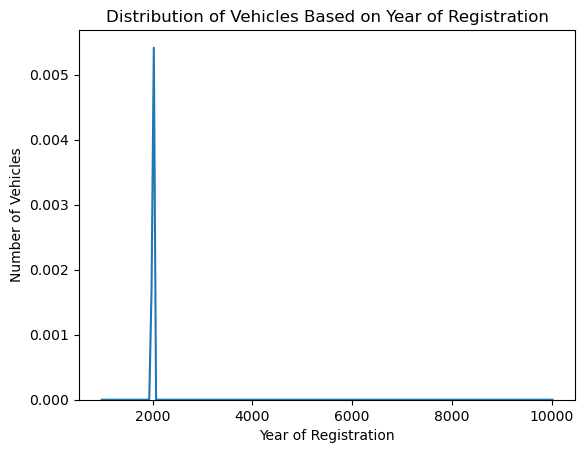

In [48]:
sns.kdeplot(data=df,x=df["registration_year"])
plt.xlabel("Year of Registration")
plt.ylabel("Number of Vehicles")
plt.title("Distribution of Vehicles Based on Year of Registration")
plt.show()

### 3) Create a plot based on the Variation of the price range by the vehicle type

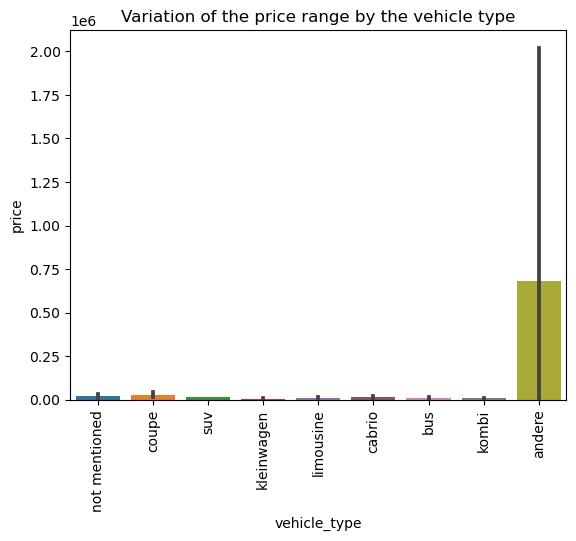

In [65]:
sns.barplot(data=df,x=df["vehicle_type"],y=df["price"])
plt.xticks(rotation=90)
plt.title("Variation of the price range by the vehicle type")
plt.show()

### 4) Find out Total count of vehicles by type available on ebay for sale.As well as create a visualization for the client

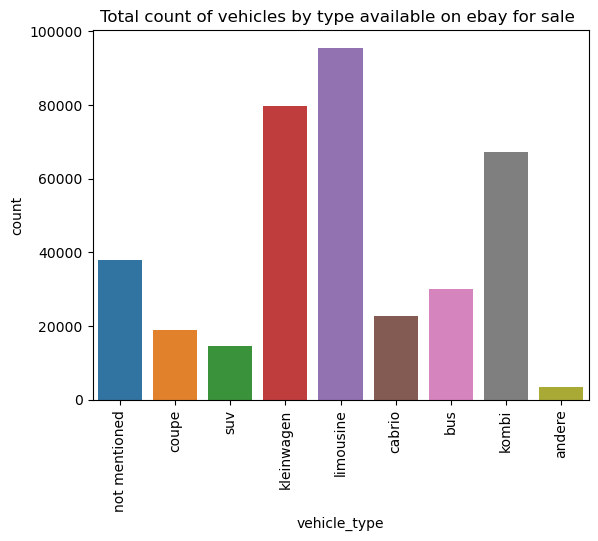

In [75]:
sns.countplot(data=df,x="vehicle_type")
plt.xticks(rotation=90)
plt.title("Total count of vehicles by type available on ebay for sale ")
plt.show()

In [67]:
df["vehicle_type"].value_counts()

limousine        95508
kleinwagen       79708
kombi            67264
not mentioned    37773
bus              30090
cabrio           22829
coupe            18954
suv              14604
andere            3350
Name: vehicle_type, dtype: int64

###  5) Is there any relationship between dollar_price and kilometer? (Explain with appropriate analysis)

<Axes: >

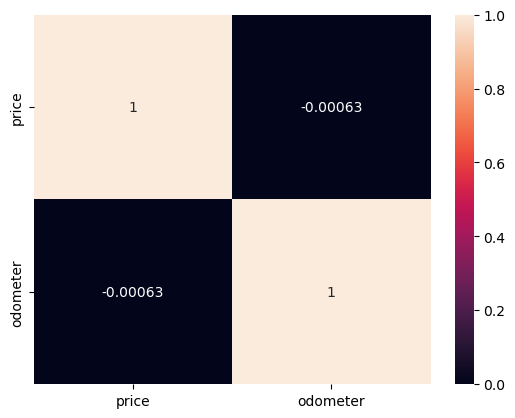

In [76]:
sns.heatmap(df[["price","odometer"]].corr(method="pearson"),annot=True)